# Lecture-06-2 Transfer Matrix Method
* author : Wei-Kai Lee
* Data : 2019/12/17


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

<img src="Lecture-6-Material/Fig-1.jpg" width="400">
$$Fig. 1.$$

## Propagation Matrix

In the previous section, 

<font size="4">$$\textbf{E}_+(z+\Delta z) = \textbf{E}_+exp(ik_z(z+\Delta z)) = \textbf{E}_+(z)exp(ik_z\Delta z)  - (1)$$</font>
<font size="4">$$\textbf{E}_-(z+\Delta z) = \textbf{E}_-exp(-ik_z(z+\Delta z)) =  \textbf{E}_-(z)exp(-ik_z\Delta z)- (2)$$</font>

In matrix representation,

<font size="4">$$\left( \begin{array}{c} \textbf{E}_+(z+\Delta z) \\ \textbf{E}_-(z+\Delta z) \end{array} \right) = \left( \begin{array}{cc} exp(ik_z\Delta z) & 0 \\ 0 & exp(-ik_z\Delta z) \end{array} \right)\left( \begin{array}{c} \textbf{E}_+(z) \\ \textbf{E}_-(z) \end{array} \right) - (3)$$</font>
<font size="4">$$\textbf{M}_p(\Delta z) = \left( \begin{array}{cc} exp(ik_z\Delta z) & 0 \\ 0 & exp(-ik_z\Delta z) \end{array} \right) - (4)$$</font>


**Eq. (9)** is valid for both TE mode and TM mode and is also valid for $H$ field.

=========================================================================================================================

In order to speed up the calculation in Python, we would use [vectorization method](https://en.wikipedia.org/wiki/Array_programming) to coding. As a result, although the matrix representation is more easily to understand, it is not suitable for matrix representation in vectorization. Hence, in the follwing section, the code would be slightly different from the derived equations.

=========================================================================================================================


In [2]:
def Propagation(Fp, Fm, kz, dz):
    # Fp : field propagating toward +z
    # Fm : field propagating toward -z
    # kz : z component of wave vector
    # dz : delta z (can be positive or negative)
    Fp2 = Fp * np.exp(1j*kz*dz)
    Fm2 = Fm * np.exp(-1j*kz*dz)
    return Fp2, Fm2

## Boundary Matrix

In **Lecture 6-1**

### TE mode
<font size="4">$$\textbf{E}_{\textbf{s}}(z) = E_{\textbf{s},+}(z)\hat{\textbf{s}} + E_{\textbf{s},-}(z)\hat{\textbf{s}} - (10)$$</font>
<font size="4">$$\textbf{H}_{\textbf{s}}(z) = \frac{kE_{\textbf{s},+}(z)}{\omega\mu_0\mu_r}\hat{\textbf{p}}_+ + \frac{kE_{\textbf{s},-}(z)}{\omega\mu_0\mu_r}\hat{\textbf{p}}_- - (11)$$</font>

### TM mode
<font size="4">$$\textbf{E}_{\textbf{p}}(z) = \frac{-kH_{\textbf{p},+}(z)}{\omega\epsilon_0\epsilon_r} \hat{\textbf{p}}_+ + \frac{-kH_{\textbf{p},-}(z)}{\omega\epsilon_0\epsilon_r} \hat{\textbf{p}}_- - (12)$$</font>
<font size="4">$$\textbf{H}_{\textbf{p}}(z) = H_{\textbf{p},+}(z)\hat{\textbf{s}} + H_{\textbf{p},-}(z)\hat{\textbf{s}} - (13)$$</font>



Based on the boundary condition in **Lecture 3**

<font size="4">$$\hat{\textbf{a}}_n\cdot(\textbf{D}_1-\textbf{D}_2)=\rho_S=0 - (14)$$</font>
<font size="4">$$\hat{\textbf{a}}_n\cdot(\textbf{B}_1-\textbf{B}_2)=0 - (15)$$</font>
<font size="4">$$\hat{\textbf{a}}_n\times(\textbf{E}_1-\textbf{E}_2)=\textbf{0} - (16)$$</font>
<font size="4">$$\hat{\textbf{a}}_n\times(\textbf{H}_1-\textbf{H}_2)=\textbf{J}_S=\textbf{0} - (17)$$</font>

Hence, at i-th interface ($z = z_i$)

<font size="4">$$E_{x,i} = E_{x,i+1} - (18)$$</font>
<font size="4">$$E_{y,i} = E_{y,i+1} - (19)$$</font>
<font size="4">$$H_{x,i} = H_{x,i+1} - (20)$$</font>
<font size="4">$$H_{y,i} = H_{y,i+1} - (21)$$</font>
<font size="4">$$D_{z,i} = D_{z,i+1} - (22)$$</font>
<font size="4">$$B_{z,i} = B_{z,i+1} - (23)$$</font>

**Eq. (18,19)**  shows the continuous equation of the tangential electric field (from $\nabla\times\textbf{E}$)
**Eq. (20,21)**  shows the continuous equation of the tangential magnetic field (from $\nabla\times\textbf{H}$)
**Eq. (22)**  shows the continuous equation of the normal displacement field (from $\nabla\cdot\textbf{D}$)
**Eq. (23)**  shows the continuous equation of the normal displacement field (from $\nabla\cdot\textbf{B}$)

Besides, in **Lecture 6-1**

<font size="4">$$\hat{\textbf{s}} = \left( \begin{array}{c} -k_y/k_t \\ k_x/k_t \\ 0 \end{array} \right) - (24)$$</font>
<font size="4">$$\hat{\textbf{p}}_{\pm} = \left( \begin{array}{c} \mp \frac{k_zk_x}{kk_t} \\ \mp \frac{k_zk_y}{kk_t} \\ \frac{k_t}{k} \end{array} \right) - (25)$$</font>



### **Eq. (18-23)** for TE mode 
<font size="4">$$\frac{-k_y}{k_t}(E_{\textbf{s},+,i}(z_i^-)+E_{\textbf{s},-,i}(z_i^-)) = \frac{-k_y}{k_t}(E_{\textbf{s},+,i+1}(z_i^+)+E_{\textbf{s},-,i+1}(z_i^+)) - (26)$$</font>
<font size="4">$$\frac{k_x}{k_t}(E_{\textbf{s},+,i}(z_i^-)+E_{\textbf{s},-,i}(z_i^-)) = \frac{k_x}{k_t}(E_{\textbf{s},+,i+1}(z_i^+)+E_{\textbf{s},-,i+1}(z_i^+)) - (27)$$</font>
<font size="4">$$\frac{E_{\textbf{s},+,i}(z_i^-)}{\omega\mu_0\mu_{r,i}}\frac{-k_{z,i}k_x}{k_t} + \frac{E_{\textbf{s},-,i}(z_i^-)}{\omega\mu_0\mu_{r,i}}\frac{k_{z,i}k_x}{k_t} = \frac{E_{\textbf{s},+,i+1}(z_i^+)}{\omega\mu_0\mu_{r,i+1}}\frac{-k_{z,i+1}k_x}{k_t} + \frac{E_{\textbf{s},-,i+1}(z_i^+)}{\omega\mu_0\mu_{r,i+1}}\frac{k_{z,i+1}k_x}{k_t} - (28)$$</font>
<font size="4">$$\frac{E_{\textbf{s},+,i}(z_i^-)}{\omega\mu_0\mu_{r,i}}\frac{-k_{z,i}k_y}{k_t} + \frac{E_{\textbf{s},-,i}(z_i^-)}{\omega\mu_0\mu_{r,i}}\frac{k_{z,i}k_y}{k_t} = \frac{E_{\textbf{s},+,i+1}(z_i^+)}{\omega\mu_0\mu_{r,i+1}}\frac{-k_{z,i+1}k_y}{k_t} + \frac{E_{\textbf{s},-,i+1}(z_i^+)}{\omega\mu_0\mu_{r,i+1}}\frac{k_{z,i+1}k_y}{k_t} - (29)$$</font>
<font size="4">$$0 = 0 - (30)$$</font>
<font size="4">$$\frac{E_{\textbf{s},+,i}(z_i^-)}{\omega}k_t + \frac{E_{\textbf{s},-,i}(z_i^-)}{\omega}k_t = \frac{E_{\textbf{s},+,i+1}(z_i^+)}{\omega}k_t + \frac{E_{\textbf{s},-,i+1}(z_i^+)}{\omega}k_t - (31)$$</font>

Although **Eq. (26-31)** seems complicated and tedious, **Eq. (26)** = **Eq. (27)** = **Eq. (31)** and **Eq. (28)** = **Eq. (29)**. Only two equation are independent. The reason of **Eq. (26)** = **Eq. (27)** and **Eq. (28)** = **Eq. (29)** is that now we only considered TE mode and actually, it is only along one direction on x-y plane. As a result, the equation of x and y are similar to each other. Besides, **Eq. (27)** = **Eq. (31)** is caused by the continuity equation we stated in the previos lecture.

<font size="4">$$E_{\textbf{s},+,i}(z_i^-)+E_{\textbf{s},-,i}(z_i^-) = E_{\textbf{s},+,i+1}(z_i^+)+E_{\textbf{s},-,i+1}(z_i^+) - (32)$$</font>
<font size="4">$$\frac{-k_{z,i}}{\mu_{r,i}}E_{\textbf{s},+,i}(z_i^-) + \frac{k_{z,i}}{\mu_{r,i}}E_{\textbf{s},-,i}(z_i^-) = \frac{-k_{z,i+1}}{\mu_{r,i+1}}E_{\textbf{s},+,i+1}(z_i^+) + \frac{k_{z,i+1}}{\mu_{r,i+1}}E_{\textbf{s},-,i+1}(z_i^+) - (33)$$</font>

,which is similar to the results in **Lecture 5-2**. 


Then the matrix representation of **Eq. (32-33)**

<font size="4">$$\left( \begin{array}{c} 1 & 1 \\ \frac{-k_{z,i}}{\mu_{r,i}} & \frac{k_{z,i}}{\mu_{r,i}} \end{array} \right)\left( \begin{array}{c} E_{\textbf{s},+,i}(z_i^-) \\ E_{\textbf{s},-,i}(z_i^-) \end{array} \right)  = \left( \begin{array}{c} 1 & 1 \\ \frac{-k_{z,i+1}}{\mu_{r,i+1}} & \frac{k_{z,i+1}}{\mu_{r,i+1}} \end{array} \right)\left( \begin{array}{c} E_{\textbf{s},+,i+1}(z_i^+) \\ E_{\textbf{s},-,i+1}(z_i^+) \end{array} \right)  - (34)$$</font>

As a result,

<font size="4">$$\left( \begin{array}{c} E_{\textbf{s},+,i}(z_i^-) \\ E_{\textbf{s},-,i}(z_i^-) \end{array} \right)  = \left( \begin{array}{c} 1 & 1 \\ \frac{-k_{z,i}}{\mu_{r,i}} & \frac{k_{z,i}}{\mu_{r,i}} \end{array} \right)^{-1} \left( \begin{array}{c} 1 & 1 \\ \frac{-k_{z,i+1}}{\mu_{r,i+1}} & \frac{k_{z,i+1}}{\mu_{r,i+1}} \end{array} \right)\left( \begin{array}{c} E_{\textbf{s},+,i+1}(z_i^+) \\ E_{\textbf{s},-,i+1}(z_i^+) \end{array} \right)  - (35)$$</font>

Then, 

<font size="4">$$\left( \begin{array}{c} E_{\textbf{s},+,i}(z_i^-) \\ E_{\textbf{s},-,i}(z_i^-) \end{array} \right)  = \frac{\mu_{r,i}}{2k_{z,i}}\left( \begin{array}{c} \frac{k_{z,i}}{\mu_{r,i}} & -1 \\ \frac{k_{z,i}}{\mu_{r,i}} & 1 \end{array} \right) \left( \begin{array}{c} 1 & 1 \\ \frac{-k_{z,i+1}}{\mu_{r,i+1}} & \frac{k_{z,i+1}}{\mu_{r,i+1}} \end{array} \right)\left( \begin{array}{c} E_{\textbf{s},+,i+1}(z_i^+) \\ E_{\textbf{s},-,i+1}(z_i^+) \end{array} \right)  - (36)$$</font>

Then, 

<font size="4">$$\left( \begin{array}{c} E_{\textbf{s},+,i}(z_i^-) \\ E_{\textbf{s},-,i}(z_i^-) \end{array} \right)  = \frac{\mu_{r,i}}{2k_{z,i}}\left( \begin{array}{c} \frac{k_{z,i}}{\mu_{r,i}}+\frac{k_{z,i+1}}{\mu_{r,i+1}} & \frac{k_{z,i}}{\mu_{r,i}}-\frac{k_{z,i+1}}{\mu_{r,i+1}} \\ \frac{k_{z,i}}{\mu_{r,i}}-\frac{k_{z,i+1}}{\mu_{r,i+1}} & \frac{k_{z,i}}{\mu_{r,i}}+\frac{k_{z,i+1}}{\mu_{r,i+1}} \end{array} \right)\left( \begin{array}{c} E_{\textbf{s},+,i+1}(z_i^+) \\ E_{\textbf{s},-,i+1}(z_i^+) \end{array} \right)  - (37)$$</font>

Then, 

<font size="4">$$\left( \begin{array}{c} E_{\textbf{s},+,i}(z_i^-) \\ E_{\textbf{s},-,i}(z_i^-) \end{array} \right)  = \left( \begin{array}{c} \frac{1}{2}+\frac{\mu_{r,i}}{2k_{z,i}}\frac{k_{z,i+1}}{\mu_{r,i+1}} & \frac{1}{2}-\frac{\mu_{r,i}}{2k_{z,i}}\frac{k_{z,i+1}}{\mu_{r,i+1}} \\ \frac{1}{2}-\frac{\mu_{r,i}}{2k_{z,i}}\frac{k_{z,i+1}}{\mu_{r,i+1}} & \frac{1}{2}+\frac{\mu_{r,i}}{2k_{z,i}}\frac{k_{z,i+1}}{\mu_{r,i+1}} \end{array} \right)\left( \begin{array}{c} E_{\textbf{s},+,i+1}(z_i^+) \\ E_{\textbf{s},-,i+1}(z_i^+) \end{array} \right)  - (38)$$</font>

and similarly, 

<font size="4">$$\left( \begin{array}{c} E_{\textbf{s},+,i+1}(z_i^+) \\ E_{\textbf{s},-,i+1}(z_i^+) \end{array} \right)  = \left( \begin{array}{c} \frac{1}{2}+\frac{\mu_{r,i+1}}{2k_{z,i+1}}\frac{k_{z,i}}{\mu_{r,i}} & \frac{1}{2}-\frac{\mu_{r,i+1}}{2k_{z,i+1}}\frac{k_{z,i}}{\mu_{r,i}} \\ \frac{1}{2}-\frac{\mu_{r,i+1}}{2k_{z,i+1}}\frac{k_{z,i}}{\mu_{r,i}} & \frac{1}{2}+\frac{\mu_{r,i+1}}{2k_{z,i+1}}\frac{k_{z,i}}{\mu_{r,i}} \end{array} \right)\left( \begin{array}{c} E_{\textbf{s},+,i}(z_i^-) \\ E_{\textbf{s},-,i}(z_i^-) \end{array} \right)  - (39)$$</font>

Hence, 

<font size="4">$$\left( \begin{array}{c} E_{\textbf{s},+,i+1}(z_i^+) \\ E_{\textbf{s},-,i+1}(z_i^+) \end{array} \right)  = \textbf{M}_{TE,i \rightarrow i+1} \left( \begin{array}{c} E_{\textbf{s},+,i}(z_i^-) \\ E_{\textbf{s},-,i}(z_i^-) \end{array} \right)  - (40)$$</font>

Although it is tedious from **Eq (34-39)**, we finally get the relation between the electric field toward +z and -z in material i and i+1 on the interface $z_i$ (**Eq. (38-39)**)

In [3]:
def BondaryCondition_TE(kz_i, kz_i_1, mur_i = 1.0, mur_i_1 = 1.0):
    # kz_i    : z component of wave vector in material i
    # kz_i_1  : z component of wave vector in material i+1
    # mur_i   : relative permeability of material i
    # mur_i_1 : relative permeability of material i+1
    
    # Because the second term of each component in the boundary matrix is the same,
    # in order to speed up the calculation, it is proper to caluclate it at first
    Tempt = (mur_i_1 * kz_i)/(2 *mur_i * kz_i_1) 

    # Intuitively, based on Eq. (39), the coding method is to construct a 2X2 boundary matrix.
    # However, this method should use for loop to calculate the boundary matrix with 
    # different direction, which is not suitable for Python accerlation, 
    # In order to accelerate the code, we calculate the elements of the boundary matrix
    # separately and the size of the element is the same as the size of the direction. 
    MTE11 = 0.5 + Tempt
    MTE12 = 0.5 - Tempt
    MTE21 = MTE12
    MTE22 = MTE11
    
    return MTE11, MTE12, MTE21, MTE22

### **Eq. (18-23)** for TM mode 

<font size="4">$$\frac{k_{z,i}k_x}{k_t}\frac{H_{\textbf{p},+,i}(z_i^-)}{\omega\epsilon_0\epsilon_{r,i}} - \frac{k_{z,i}k_x}{k_t}\frac{H_{\textbf{p},-,i}(z_i^-)}{\omega\epsilon_0\epsilon_{r,i}} = \frac{k_{z,i+1}k_x}{k_t}\frac{H_{\textbf{p},+,i+1}(z_i^+)}{\omega\epsilon_0\epsilon_{r,i+1}} - \frac{k_{z,i+1}k_x}{k_t}\frac{H_{\textbf{p},-,i+1}(z_i^+)}{\omega\epsilon_0\epsilon_{r,i+1}} - (41)$$</font>
<font size="4">$$\frac{k_{z,i}k_y}{k_t}\frac{H_{\textbf{p},+,i}(z_i^-)}{\omega\epsilon_0\epsilon_{r,i}} - \frac{k_{z,i}k_y}{k_t}\frac{H_{\textbf{p},-,i}(z_i^-)}{\omega\epsilon_0\epsilon_{r,i}} = \frac{k_{z,i+1}k_y}{k_t}\frac{H_{\textbf{p},+,i+1}(z_i^+)}{\omega\epsilon_0\epsilon_{r,i+1}} - \frac{k_{z,i+1}k_y}{k_t}\frac{H_{\textbf{p},-,i+1}(z_i^+)}{\omega\epsilon_0\epsilon_{r,i+1}} - (42)$$</font>
<font size="4">$$-\frac{k_y}{k_t}H_{\textbf{p},+,i}(z_i^-) - \frac{k_y}{k_t} H_{\textbf{p},-,i}(z_i^-) = -\frac{k_y}{k_t}H_{\textbf{p},+,i+1}(z_i^+) - \frac{k_y}{k_t} H_{\textbf{p},-,i+1}(z_i^+) - (43)$$</font>
<font size="4">$$\frac{k_x}{k_t}H_{\textbf{p},+,i}(z_i^-) + \frac{k_x}{k_t} H_{\textbf{p},-,i}(z_i^-) = \frac{k_x}{k_t}H_{\textbf{p},+,i+1}(z_i^+) + \frac{k_x}{k_t} H_{\textbf{p},-,i+1}(z_i^+) - (44)$$</font>
<font size="4">$$-k_t\frac{H_{\textbf{p},+,i}(z_i^-)}{\omega} - k_t\frac{H_{\textbf{p},-,i}(z_i^-)}{\omega} = - k_t\frac{H_{\textbf{p},+,i+1}(z_i^+)}{\omega} - k_t\frac{H_{\textbf{p},-,i+1}(z_i^+)}{\omega} - (45)$$</font>
<font size="4">$$0 = 0 - (46)$$</font>

As the similar reason in TE mode, **Eq. (41)** = **Eq. (42)**, and **Eq. (43)** = **Eq. (44)** = **Eq. (45)**.

Then

<font size="4">$$k_{z,i}\frac{H_{\textbf{p},+,i}(z_i^-)}{\epsilon_{r,i}} - k_{z,i}\frac{H_{\textbf{p},-,i}(z_i^-)}{\epsilon_{r,i}} = k_{z,i+1}\frac{H_{\textbf{p},+,i+1}(z_i^+)}{\epsilon_{r,i+1}} - k_{z,i+1}\frac{H_{\textbf{p},-,i+1}(z_i^+)}{\epsilon_{r,i+1}} - (47)$$</font>
<font size="4">$$H_{\textbf{p},+,i}(z_i^-) + H_{\textbf{p},-,i}(z_i^-) = H_{\textbf{p},+,i+1}(z_i^+) + H_{\textbf{p},-,i+1}(z_i^+) - (48)$$</font>


,which is also similar to the results in **Lecture 5-2**.


Then the matrix representation

<font size="4">$$\left( \begin{array}{c} 1 & 1 \\ \frac{k_{z,i}}{\epsilon_{r,i}} & \frac{-k_{z,i}}{\epsilon_{r,i}} \end{array} \right)\left( \begin{array}{c} H_{\textbf{p},+,i}(z_i^-) \\ H_{\textbf{p},-,i}(z_i^-) \end{array} \right)  = \left( \begin{array}{c} 1 & 1 \\ \frac{k_{z,i+1}}{\epsilon_{r,i+1}} & \frac{-k_{z,i+1}}{\epsilon_{r,i+1}} \end{array} \right)\left( \begin{array}{c} H_{\textbf{p},+,i+1}(z_i^+) \\ H_{\textbf{p},-,i+1}(z_i^+) \end{array} \right)  - (49)$$</font>


As a result,

<font size="4">$$\left( \begin{array}{c} H_{\textbf{p},+,i}(z_i^-) \\ H_{\textbf{p},-,i}(z_i^-) \end{array} \right)  = \left( \begin{array}{c} 1 & 1 \\ \frac{k_{z,i}}{\epsilon_{r,i}} & \frac{-k_{z,i}}{\epsilon_{r,i}} \end{array} \right)^{-1}\left( \begin{array}{c} 1 & 1 \\ \frac{k_{z,i+1}}{\epsilon_{r,i+1}} & \frac{-k_{z,i+1}}{\epsilon_{r,i+1}} \end{array} \right)\left( \begin{array}{c} H_{\textbf{p},+,i+1}(z_i^+) \\ H_{\textbf{p},-,i+1}(z_i^+) \end{array} \right)  - (50)$$</font>

Then 

<font size="4">$$ \left( \begin{array}{c} H_{\textbf{p},+,i}(z_i^-) \\ H_{\textbf{p},-,i}(z_i^-) \end{array} \right)  = \frac{\epsilon_{r,i}}{2k_{z,i}} \left( \begin{array}{c} \frac{k_{z,i}}{\epsilon_{r,i}} & 1 \\ \frac{k_{z,i}}{\epsilon_{r,i}} & -1 \end{array} \right) \left( \begin{array}{c} 1 & 1 \\ \frac{k_{z,i+1}}{\epsilon_{r,i+1}} & \frac{-k_{z,i+1}}{\epsilon_{r,i+1}} \end{array} \right)\left( \begin{array}{c} H_{\textbf{p},+,i+1}(z_i^+) \\ H_{\textbf{p},-,i+1}(z_i^+) \end{array} \right)  - (51)$$</font>

Then 

<font size="4">$$ \left( \begin{array}{c} H_{\textbf{p},+,i}(z_i^-) \\ H_{\textbf{p},-,i}(z_i^-) \end{array} \right)  = \frac{\epsilon_{r,i}}{2k_{z,i}} \left( \begin{array}{c} \frac{k_{z,i}}{\epsilon_{r,i}}+\frac{k_{z,i+1}}{\epsilon_{r,i+1}} & \frac{k_{z,i}}{\epsilon_{r,i}}-\frac{k_{z,i+1}}{\epsilon_{r,i+1}} \\ \ \frac{k_{z,i}}{\epsilon_{r,i}}-\frac{k_{z,i+1}}{\epsilon_{r,i+1}} & \frac{k_{z,i}}{\epsilon_{r,i}}+\frac{k_{z,i+1}}{\epsilon_{r,i+1}} \end{array} \right)\left( \begin{array}{c} H_{\textbf{p},+,i+1}(z_i^+) \\ H_{\textbf{p},-,i+1}(z_i^+) \end{array} \right)  - (52)$$</font>

Then 

<font size="4">$$ \left( \begin{array}{c} H_{\textbf{p},+,i}(z_i^-) \\ H_{\textbf{p},-,i}(z_i^-) \end{array} \right)  = \left( \begin{array}{c} \frac{1}{2}+\frac{\epsilon_{r,i}}{2k_{z,i}}\frac{k_{z,i+1}}{\epsilon_{r,i+1}} & \frac{1}{2}-\frac{\epsilon_{r,i}}{2k_{z,i}}\frac{k_{z,i+1}}{\epsilon_{r,i+1}} \\ \ \frac{1}{2}-\frac{\epsilon_{r,i}}{2k_{z,i}}\frac{k_{z,i+1}}{\epsilon_{r,i+1}} & \frac{1}{2}+\frac{\epsilon_{r,i}}{2k_{z,i}}\frac{k_{z,i+1}}{\epsilon_{r,i+1}} \end{array} \right)\left( \begin{array}{c} H_{\textbf{p},+,i+1}(z_i^+) \\ H_{\textbf{p},-,i+1}(z_i^+) \end{array} \right)  - (53)$$</font>

and similarly, 

<font size="4">$$ \left( \begin{array}{c} H_{\textbf{p},+,i+1}(z_i^+) \\ H_{\textbf{p},-,i+1}(z_i^+) \end{array} \right)  = \left( \begin{array}{c} \frac{1}{2}+\frac{\epsilon_{r,i+1}}{2k_{z,i+1}}\frac{k_{z,i}}{\epsilon_{r,i}} & \frac{1}{2}-\frac{\epsilon_{r,i+1}}{2k_{z,i+1}}\frac{k_{z,i}}{\epsilon_{r,i}} \\ \ \frac{1}{2}-\frac{\epsilon_{r,i+1}}{2k_{z,i+1}}\frac{k_{z,i}}{\epsilon_{r,i}} & \frac{1}{2}+\frac{\epsilon_{r,i+1}}{2k_{z,i+1}}\frac{k_{z,i}}{\epsilon_{r,i}} \end{array} \right)\left( \begin{array}{c} H_{\textbf{p},+,i}(z_i^-) \\ H_{\textbf{p},-,i}(z_i^-) \end{array} \right)  - (54)$$</font>

Hence, 

<font size="4">$$ \left( \begin{array}{c} H_{\textbf{p},+,i+1}(z_i^+) \\ H_{\textbf{p},-,i+1}(z_i^+) \end{array} \right)  = \textbf{M}_{TM,i \rightarrow i+1}\left( \begin{array}{c} H_{\textbf{p},+,i}(z_i^-) \\ H_{\textbf{p},-,i}(z_i^-) \end{array} \right)  - (55)$$</font>

In [4]:
def BondaryCondition_TM(kz_i, kz_i_1, er_i = 1.0, er_i_1 = 1.0):
    # kz_i   : z component of wave vector in material i
    # kz_i_1 : z component of wave vector in material i+1
    # er_i   : relative permittivity of material i
    # er_i_1 : relative permittivity of material i+1

    # Because the second term of each component in the boundary matrix is the same,
    # in order to speed up the calculation, it is proper to caluclate it at first
    Tempt = (er_i_1 * kz_i)/(2 *er_i * kz_i_1)
    # Intuitively, based on Eq. (52), the coding method is to construct a 2X2 boundary matrix.
    # However, this method should use for loop to calculate the boundary matrix with 
    # different direction, which is not suitable for Python accerlation, 
    # In order to accelerate the code, we calculate the elements of the boundary matrix
    # separately and the size of the element is the same as the size of the direction. 
    MTM11 = 0.5 + Tempt
    MTM12 = 0.5 - Tempt
    MTM21 = MTM12
    MTM22 = MTM11
    return MTM11, MTM12, MTM21, MTM22

<img src="Lecture-6-Material/Fig-1.jpg" width="400">
$$Fig. 1.$$

We have calculated the propagation matrix (**Eq. (3)**) and the matrix relation between the +z and -z field in material i and material i+1 (**Eq. (39, 52)**). 

As shown in **Fig. 1**, the calculation procedute of the relation between the field at $z = 0$ and $z = z_m$ would be

propagation ($d_0$)$\rightarrow$ boundary ($z = z_0$)$\rightarrow$propagation ($d_1$)$\rightarrow$ boundary ($z = z_1$)$\rightarrow$ ...... $\rightarrow$propagation ($d_{m-1}$)$\rightarrow$ boundary ($z = z_{m-1}$)$\rightarrow$propagation ($d_{m}$)

Now, we have calculated the relation between the incident plane ($z = 0$) and the exit plane ($z = z_m$). 

Besides, following the procedure, we can construct a transfer matrix, $M$, for +z and -z wave in $z = 0$ and $z = z_m$, as

<font size="4"> $$\textbf{M} =  \textbf{M}_p(d_m) \textbf{M}_{TE/TM,m-1\rightarrow m}\textbf{M}_p(d_{m-1})...\textbf{M}_{TE/TM,i\rightarrow i+1}\textbf{M}_p(d_i)... \textbf{M}_{TE/TM,1\rightarrow 2} \textbf{M}_p(d_1) \textbf{M}_{TE/TM,0\rightarrow 1}\textbf{M}_p(d_0)  - (56)$$</font>

In [5]:
def cal_k_list(ko, er_list = [1.0], mur_list = None):
    # cal_k_list is a function to calculate the wave number in each layer
    
    # ko : wave number in vacuum
    # er_list : a list of relative permittivity
    # mur_list : a list of relative permeability (if mur_list == None, the default value = 1.0)
    er_list = np.array( er_list, dtype = np.complex )
    mur_list = np.ones( er_list.shape, dtype=er_list.dtype) if (mur_list is None) else np.array( mur_list, dtype = np.complex )

    n_list = np.sqrt( er_list*mur_list )
    k_list = n_list * ko
    return k_list
def cal_kz_list(kx, ky, k_list):
    # cal_kz_list is a function to calculate the z component of ave number in each layer.

    # kx, ky : x, y component of wavevector 
    # k_list : a list of wave number in each layer ( k_list.size equals to the number of material)
    kz_list = np.zeros( (k_list.size, kx.size) , dtype=np.complex)
    for ii in range(k_list.size):
        kz_list[ii] = np.sqrt( k_list[ii]**2 - kx**2 - ky**2, dtype=np.complex )
    return kz_list

In [6]:
def cal_transfer_matrix( kx, ky, thickness_list, ko, er_list , mur_list = None, mode='TE'):
    # cal_transfer_matrix is a function to calculate the transfer matrix of a layered structure of a given mode
     
    # kx    : x component of wave vector
    # ky    : y component of wave vector
    # thickness_list : the thicknesses of the material, thickness_list.size is the number of the materials, 
    #                  and thickness_list[0] is the incident material
    # ko : wave number in vacuum
    # er_list : a list of relative permittivity
    # mur_list : a list of relative permeability (if mur_list == None, the default value = 1.0)
    # mode : mode type (TE or TM)
    
    # input process
    kx = np.array( kx, dtype = np.complex )
    ky = np.array( ky, dtype = np.complex )
    er_list = np.array( er_list, dtype = np.complex )
    mur_list = np.ones( er_list.shape, dtype=er_list.dtype) if (mur_list is None) else np.array( mur_list, dtype = np.complex )

    # check input size
    assert kx.shape == ky.shape and er_list.shape == mur_list.shape and len(thickness_list) == er_list.size
    
    # check mode
    if mode.upper() != 'TE' and mode.upper() != 'TM':
        print('ERROR mode : {0}'.format(mode) )
        assert False
        
    # calculate wave number information in each layer
    k_list  = cal_k_list(ko, er_list = er_list, mur_list = mur_list)
    kz_list = cal_kz_list(kx, ky, k_list) 
    
    # transfer matrix component preparation (identity in the beginning)
    M11, M12 =  np.ones( kx.shape, dtype=np.complex ), np.zeros( kx.shape, dtype=np.complex )
    M21, M22 = np.zeros( kx.shape, dtype=np.complex ),  np.ones( kx.shape, dtype=np.complex )
    if len(thickness_list) == 0:
        return M11, M12, M21, M22
        
    # calculate transfer matrix
    for ii in range( len(thickness_list)-1 ):
        # wave propagation
        M11, M21 = Propagation(M11, M21, kz_list[ii], thickness_list[ii])
        M12, M22 = Propagation(M12, M22, kz_list[ii], thickness_list[ii])
        
        # boundary condition
        if mode.upper() == 'TE':
            BC11, BC12, BC21, BC22 = BondaryCondition_TE(kz_list[ii], kz_list[ii+1], mur_i = mur_list[ii], mur_i_1 = mur_list[ii+1])
        elif mode.upper() == 'TM':
            BC11, BC12, BC21, BC22 = BondaryCondition_TM(kz_list[ii], kz_list[ii+1], er_i = er_list[ii], er_i_1 = er_list[ii+1])
        M11_next, M12_next = BC11*M11+BC12*M21, BC11*M12+BC12*M22
        M21_next, M22_next = BC21*M11+BC22*M21, BC21*M12+BC22*M22
        M11, M12, M21, M22 = M11_next, M12_next, M21_next, M22_next
    # wave propagation
    M11, M22 = Propagation(M11, M22, kz_list[-1], thickness_list[-1])
    return M11, M12, M21, M22

Now, we have calculated the relation between the incident plane ($z = 0$) and the exit plane ($z = z_m$). 

<font size="4">$$\left( \begin{array}{c} F_{+,m}(z=z_m) \\ F_{-,m}(z=z_m) \end{array} \right)  = \textbf{M} \left( \begin{array}{c} F_{+,0}(z=0) \\ F_{-,0}(z=0) \end{array} \right) = \left( \begin{array}{c} M_{11} & M_{12} \\ M_{21} & M_{22} \end{array} \right) \left( \begin{array}{c} F_{+,0}(z=0) \\ F_{-,0}(z=0) \end{array} \right) - (57)$$</font>

As a result, we can calculate the reflection coefficients, $\gamma$, and the transmission coefficients, $\tau$ by inserting the boundary condition into **Eq. (57)**.

<font size="4">$$\left( \begin{array}{c} \tau \\ 0 \end{array} \right)  = \left( \begin{array}{c} M_{11} & M_{12} \\ M_{21} & M_{22} \end{array} \right) \left( \begin{array}{c} 1 \\ \gamma \end{array} \right) - (58)$$</font>

Then

<font size="4">$$\tau = M_{11} + M_{12}\gamma - (59)$$</font>
<font size="4">$$0 = M_{21} + M_{22}\gamma - (60)$$</font>

We can calculate $\gamma$ first, 

<font size="4">$$\gamma = -\frac{M_{21}}{M_{22}} - (61)$$</font>

Then,

<font size="4">$$\tau = M_{11} - M_{12}\frac{M_{21}}{M_{22}} = \frac{M_{11}M_{22} - M_{12}M_{21}}{M_{22}}- (62)$$</font>


In [7]:
def cal_r_tau_from_M(M11, M12, M21, M22):
    # M11, M12, M21, and M22 are the matrix elements in transfer matrix
    
    r = -M21/M22 # Eq. (61)
    tau = M11 + M12 * r # Eq. (59)
    return tau, r

In [8]:
def cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list , mur_list = None, mode='TE'):
    # kx    : x component of wave vector
    # ky    : y component of wave vector
    # thickness_list : the thicknesses of the material, thickness_list.size is the number of the materials, 
    #                  and thickness_list[0] is the incident material
    # ko : wave number in vacuum
    # er_list : a list of relative permittivity
    # mur_list : a list of relative permeability (if mur_list == None, the default value = 1.0)
    # mode : mode type (TE or TM)
    M11, M12, M21, M22 = cal_transfer_matrix( kx, ky, thickness_list, ko, er_list = er_list , mur_list = mur_list, mode = mode)
    tau, r = cal_r_tau_from_M(M11, M12, M21, M22)
    return tau, r  

Code in **Lecture 5-2**

In [9]:
def SnellLaw(theta_i, ni, nt=1.0):
    # theta_i : incident angle
    # ni : the refractive index of the incident material
    # nt : the refractive index of the transmissive material
    theta_i = np.array( theta_i, dtype=np.complex_ )
    
    # theta_t : refractive angle
    theta_t = np.arcsin( (ni/nt) * np.sin(theta_i) )
    return theta_t
def solve_r_tau_s_E(kz1, kz2):
    # kz1 : the z component of the wave vector in material 1
    # kz2 : the z component of the wave vector in material 2
    
    # according to Eq. (40)
    tau_s_E = 2*kz1 / (kz1 + kz2)
    r_s_E = (kz1 - kz2) / (kz1 + kz2)
    return tau_s_E, r_s_E
def solve_r_tau_p_H(kz1, kz2, n1, n2):
    # kz1 : the z component of the wave vector in material 1
    # kz2 : the z component of the wave vector in material 2
    # n1 : the reflective index of material 1
    # n2 : the reflective index of material 2
    
    er1, er2 = n1**2, n2**2
    # according to Eq. (58)
    tau_p_H = (2*er2*kz1) / (er2*kz1 + er1*kz2)
    r_p_H = (er2*kz1 - er1*kz2) / (er2*kz1 + er1*kz2)
    return tau_p_H, r_p_H
def solve_r_tau_p_E(kz1, kz2, n1, n2):
    # kz1 : the z component of the wave vector in material 1
    # kz2 : the z component of the wave vector in material 2
    # n1 : the reflective index of material 1
    # n2 : the reflective index of material 2
    
    er1, er2 = n1**2, n2**2
    # according to Eq. (64)
    tau_p_E = (n1/n2) * (2*er2*kz1) / (er2*kz1 + er1*kz2)
    r_p_E = (er2*kz1 - er1*kz2) / (er2*kz1 + er1*kz2)
    return tau_p_E, r_p_E

## Example

In [10]:
n1, n2 = 1.5, 1.0
theta1 = np.linspace( 0, np.pi/2, 90)
wavelength = 520
e0, mu0 = 1.0, 1.0

theta2 = SnellLaw(theta1, n1, n2)
c = 1/np.sqrt(e0*mu0)
ko = 2*np.pi/wavelength
w = c * ko
k1, k2 = n1*ko, n2*ko

kx1 = k1 * np.sin(theta1)
kz1 = k1 * np.cos(theta1)
ky1 = np.zeros( kx1.shape )

kx2 = k2 * np.sin(theta2)
kz2 = k2 * np.cos(theta2)
ky2 = np.zeros( kx2.shape )

In [11]:
# calculation from equation in Lecture 5-2
tau_s_E, r_s_E = solve_r_tau_s_E(kz1, kz2)
tau_p_H, r_p_H = solve_r_tau_p_H(kz1, kz2, n1, n2)

# calculation by transfer matrix
thickness_list = [0, 0]
er_list = [n1**2, n2**2] 
tau_s_E_TM, r_s_E_TM = cal_r_tau_from_structure( kx1, ky1, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM = cal_r_tau_from_structure( kx1, ky1, thickness_list, ko, er_list, mode='TM')


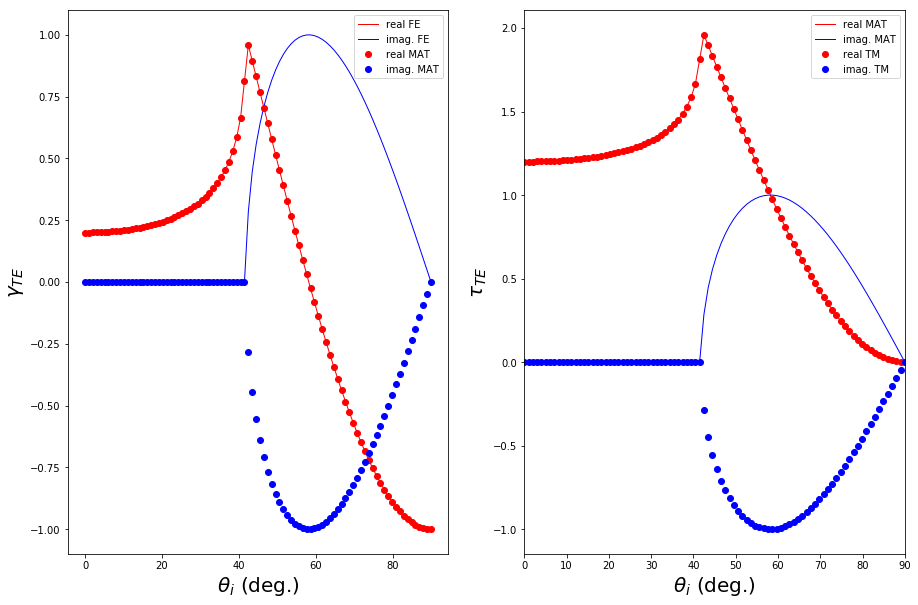

In [13]:
## plot TE data
fig, axes = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0].plot( theta1*180/np.pi, np.real( r_s_E ), 'r-', linewidth=1.0)
axes[0].plot( theta1*180/np.pi, np.imag( r_s_E ), 'b-', linewidth=1.0)
axes[0].plot( theta1*180/np.pi, np.real( r_s_E_TM ), 'ro', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, np.imag( r_s_E_TM ), 'bo', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'$\gamma_{TE}$', fontsize=20)
axes[0].legend(['real FE', 'imag. FE', 'real MAT', 'imag. MAT'], fontsize=10)
plt.xlim( 0, 90);

axes[1].plot( theta1*180/np.pi, np.real( tau_s_E ), 'r-', linewidth=1.0)
axes[1].plot( theta1*180/np.pi, np.imag( tau_s_E ), 'b-', linewidth=1.0)
axes[1].plot( theta1*180/np.pi, np.real( tau_s_E_TM ), 'ro', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, np.imag( tau_s_E_TM ), 'bo', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'$\tau_{TE}$', fontsize=20)
axes[1].legend(['real MAT', 'imag. MAT', 'real TM', 'imag. TM'], fontsize=10)
plt.xlim( 0, 90);

<font size="5">No, what's going on????</font>

This might be the first question come into your brain.
Then maybe you would have no idea how to deal with this or you would start checking maybe they would be some mistake in derivation. 

But don't be afraid. 

From **Eq.(39, 61)** and non-magnetic material

<font size="4">$$\gamma_{\textbf{s}} = -\frac{1-\frac{k_{z,i}}{k_{z,i+1}}}{1+\frac{k_{z,i}}{k_{z,i+1}}} - (63)$$</font>

Then, ($i = 1 and i+1 = 2$)

<font size="4">$$\gamma_{\textbf{s}} = \frac{k_{z,1}-k_{z,2}}{k_{z,1}+k_{z,2}} - (64)$$</font>

You might be suprised **Eq. (64)** is totally the same as in **Lecture 5-2**. Then you would start to cry again: what's going on??????

But don't be afraid again. Now we need to calm down and carefully see what we can get from this two pictures.
Then, the next question you should ask : why this two method is different "only" in the imaginary part and "only" when $\theta_i>\theta _c$ and ??? 

Hence, intuitively, we need to check the kz's value and see what's going on.

In [14]:
# calculted as in Lecture 5-2
kz1_L5_2 = k1 * np.cos(theta1)
kz2_L5_2 = k2 * np.cos(theta2)

# calculate in this lecture
thickness_list = [0, 0]
er_list = np.array( [n1**2, n2**2], dtype = np.complex )
er_list = np.array( er_list, dtype = np.complex )
mur_list = np.ones( er_list.shape, dtype=er_list.dtype)
k_list  = cal_k_list(ko, er_list = er_list, mur_list = mur_list)
kz_list = cal_kz_list(kx1, ky1, k_list) 
kz1_L6_2, kz2_L6_2 = kz_list[0], kz_list[1]

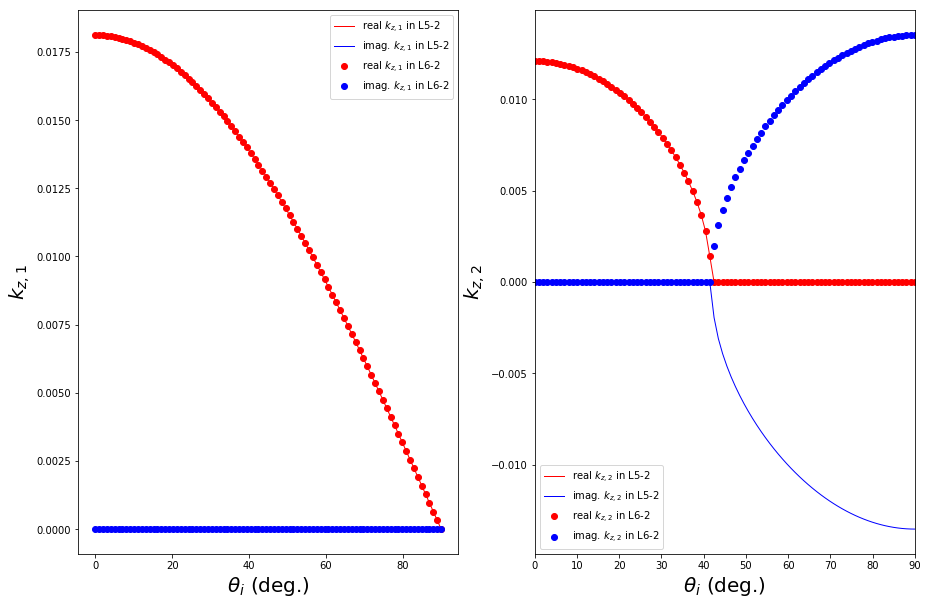

In [15]:
## plot TE data
fig, axes = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0].plot( theta1*180/np.pi, np.real( kz1_L5_2 ), 'r-', linewidth=1.0)
axes[0].plot( theta1*180/np.pi, np.imag( kz1_L5_2 ), 'b-', linewidth=1.0)
axes[0].plot( theta1*180/np.pi, np.real( kz1_L6_2 ), 'ro', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, np.imag( kz1_L6_2 ), 'bo', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'$k_{z,1}$', fontsize=20)
axes[0].legend(['real $k_{z,1}$ in L5-2', 'imag. $k_{z,1}$ in L5-2', 'real $k_{z,1}$ in L6-2', 'imag. $k_{z,1}$ in L6-2'], fontsize=10)
plt.xlim( 0, 90);

axes[1].plot( theta1*180/np.pi, np.real( kz2_L5_2 ), 'r-', linewidth=1.0)
axes[1].plot( theta1*180/np.pi, np.imag( kz2_L5_2 ), 'b-', linewidth=1.0)
axes[1].plot( theta1*180/np.pi, np.real( kz2_L6_2 ), 'ro', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, np.imag( kz2_L6_2 ), 'bo', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'$k_{z,2}$', fontsize=20)
axes[1].legend(['real $k_{z,2}$ in L5-2', 'imag. $k_{z,2}$ in L5-2', 'real $k_{z,2}$ in L6-2', 'imag. $k_{z,2}$ in L6-2'], fontsize=10)
plt.xlim( 0, 90);

Surprisingly, you can find out there is no difference in $k_{z,1}$; however, the imaginary of $k_{z,2}$ is totally different when $\theta_i > \theta_c$.

Clearly, this shows that the difference is caused by the different calculation.

Then, the next question you should ask which is correct.

Now, we need to go back to the definition of $k_z$

<font size="4">$$k^2 = k_x^2 + k_y^2 + k_z^2 - (65)$$</font>

Then intuitively, 

<font size="4">$$k_z = \sqrt{k^2 - k_x^2 - k_y^2} - (66)$$</font>

but stop, here we need to carefully deal with it now. We all know that there might be two possible value when taking the square root of (k^2 - k_x^2 - k_y^2). One root is possible as **Eq. (66)** and another is negative. 

And up to now, all the $k_z$ we consider is propagating toward +z and as a result, the real part of $k_z$ should be positive. And that's not a problem in the above figure.

Then the most important is the pure imaginary case. If $k$ is a real number and $k_x^2 + k_y^2$ is larger than $k$($\theta_i>\theta_c$), $k_z$ is a pure imaginary value and suppose $k_z = i\kappa_z$. And it is hard to judge whether $\kappa_z$ is positive or negative. But don't forget the physics, we consider now is a wave equation:

<font size="4">$$exp(ik_zz) = exp(i(i\kappa_z)z) = exp(-\kappa_zz)- (67)$$</font>

Then this would be more clear. When $\kappa_z$>0, the exponential term is increasing; in contrast, when $\kappa_z$<0, the exponential term is increasing. Physically, the fields are impossible exponential increasing because we never measure this phenomenon before. 

As a result, $k_z$ calculated in this lecture is more reasonable.

Hence, actuallly, the code in **Lecture 5-2** is wrong when $\theta_i > \theta_c$. In order to fix this question and to prevent floating when computation, we need to enhance **cal_kz** function.

In [16]:
def cal_kz(k, kx, ky):
    # n : refractive index
    # ko : wave number in vacuum
    # kx : wave number along x-axis
    # ky : wave number along y-axis
    kz = np.sqrt( k**2 - kx**2 - ky**2, dtype=np.complex_ )
    # process floating
    mask = np.abs( np.real(kz) )<1e-15  
    kz[mask] = 1j * np.imag( kz[mask] )
    mask = (np.real(kz)==0) & (np.imag( kz )<0)
    kz[mask] = -kz[mask]
    return kz
def cal_kz_list(kx, ky, k_list):
    # cal_kz_list is a function to calculate the z component of ave number in each layer.

    # kx, ky : x, y component of wavevector 
    # k_list : a list of wave number in each layer ( k_list.size equals to the number of material)
    kz_list = np.zeros( (k_list.size, kx.size) , dtype=np.complex)
    for ii in range(k_list.size):
        kz_list[ii] = cal_kz(k_list[ii], kx, ky)
    return kz_list

In [17]:
n1, n2 = 1.5, 1.0
theta1 = np.linspace( 0, np.pi/2, 90)
wavelength = 520
e0, mu0 = 1.0, 1.0

c = 1/np.sqrt(e0*mu0)
ko = 2*np.pi/wavelength
w = c * ko
k1, k2 = n1*ko, n2*ko

kx = k1 * np.sin(theta1)
ky = np.zeros( kx1.shape )
kz1 = cal_kz(k1, kx1, ky1)

kz2 = cal_kz(k2, kx, ky)

In [18]:
# calculation from equation in Lecture 5-2
tau_s_E, r_s_E = solve_r_tau_s_E(kz1, kz2)
tau_p_H, r_p_H = solve_r_tau_p_H(kz1, kz2, n1, n2)

# calculation by transfer matrix
thickness_list = [0, 0]
er_list = [n1**2, n2**2] 
tau_s_E_TM, r_s_E_TM = cal_r_tau_from_structure( kx1, ky1, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM = cal_r_tau_from_structure( kx1, ky1, thickness_list, ko, er_list, mode='TM')

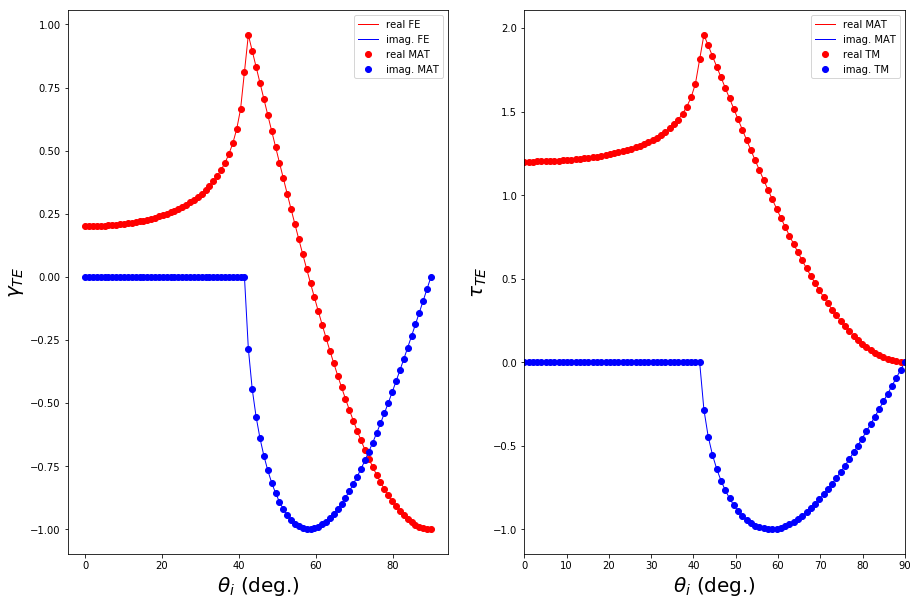

In [19]:
## plot TE data
fig, axes = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0].plot( theta1*180/np.pi, np.real( r_s_E ), 'r-', linewidth=1.0)
axes[0].plot( theta1*180/np.pi, np.imag( r_s_E ), 'b-', linewidth=1.0)
axes[0].plot( theta1*180/np.pi, np.real( r_s_E_TM ), 'ro', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, np.imag( r_s_E_TM ), 'bo', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'$\gamma_{TE}$', fontsize=20)
axes[0].legend(['real FE', 'imag. FE', 'real MAT', 'imag. MAT'], fontsize=10)
plt.xlim( 0, 90);

axes[1].plot( theta1*180/np.pi, np.real( tau_s_E ), 'r-', linewidth=1.0)
axes[1].plot( theta1*180/np.pi, np.imag( tau_s_E ), 'b-', linewidth=1.0)
axes[1].plot( theta1*180/np.pi, np.real( tau_s_E_TM ), 'ro', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, np.imag( tau_s_E_TM ), 'bo', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'$\tau_{TE}$', fontsize=20)
axes[1].legend(['real MAT', 'imag. MAT', 'real TM', 'imag. TM'], fontsize=10)
plt.xlim( 0, 90);

Now the calculation can fit well with each other. 

Up to now, we have successfully solve the total reflection coefficients and transmission coeffcients of multilayered structure and we also discuss how to deal with the $k_z$ when $\theta_i > \theta_c$. 

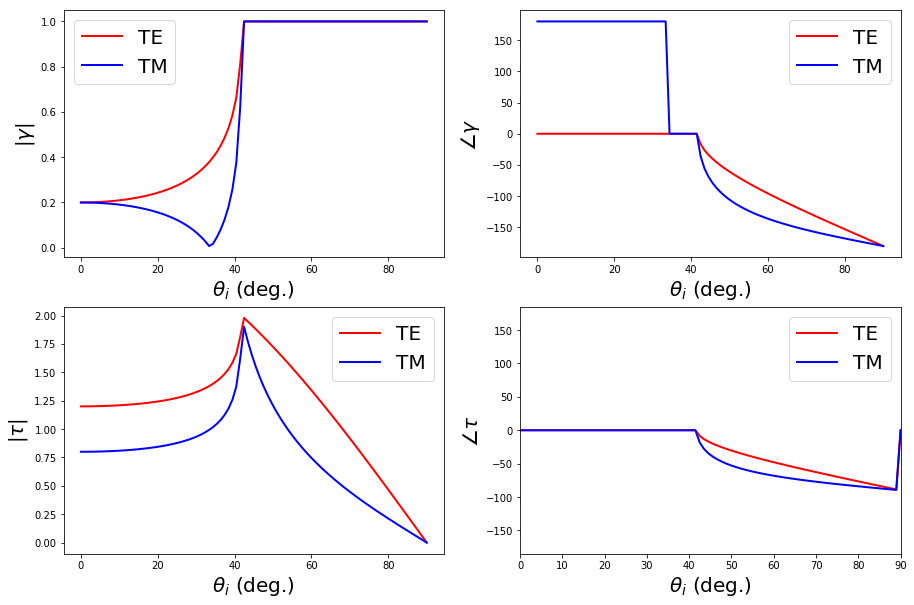

In [20]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( theta1*180/np.pi, np.abs( r_s_E ), 'r-', linewidth=2.0)
axes[0,0].plot( theta1*180/np.pi, np.abs( r_p_H ), 'b-', linewidth=2.0)
axes[0,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( theta1*180/np.pi, np.angle( r_s_E, deg=True ), 'r-', linewidth=2.0)
axes[0,1].plot( theta1*180/np.pi, np.angle( r_p_H, deg=True ), 'b-', linewidth=2.0)
axes[0,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( theta1*180/np.pi, np.abs( tau_s_E ), 'r-', linewidth=2.0)
axes[1,0].plot( theta1*180/np.pi, np.abs( tau_p_H ), 'b-', linewidth=2.0)
axes[1,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( theta1*180/np.pi, np.angle( tau_s_E, deg=True ), 'r-', linewidth=2.0)
axes[1,1].plot( theta1*180/np.pi, np.angle( tau_p_H, deg=True ), 'b-', linewidth=2.0)
axes[1,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);